In [71]:
install.packages("dlookr")

also installing the dependency 'showtext'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
showtext  0.9-2  0.9-4              TRUE
dlookr    0.4.4  0.5.4             FALSE

  Binaries will be installed
package 'showtext' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saniy\AppData\Local\Temp\RtmpuEFij1\downloaded_packages


installing the source package 'dlookr'

Warning message in install.packages("dlookr"):
"installation of package 'dlookr' had non-zero exit status"

In [113]:
library(dplyr)
library(tidyverse)
library(cowplot)
library(corrplot)


In [114]:
setwd("D:/TY sem6/DMPM LAB/Assn1")

In [115]:
data <- read.csv("pva97nk.csv")
head(data)


TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,14974,NA,2,4,1,3,17,13.50,9.25,...,13,A,0,0,NA,F,U,0,0,0
0,6294,NA,1,8,0,3,20,20.00,15.88,...,24,A,0,23,67,F,U,186800,85,0
1,46110,4,6,41,3,20,6,5.17,3.73,...,22,S,1,0,NA,M,U,87600,36,38750
1,185937,10,3,12,3,8,10,8.67,8.50,...,16,E,1,0,NA,M,U,139200,27,38942
0,29637,NA,1,1,1,1,20,20.00,20.00,...,6,F,0,35,53,M,U,168100,37,71509
1,112632,11,3,11,2,9,11,10.33,8.27,...,22,S,1,0,47,M,H,253100,0,92514


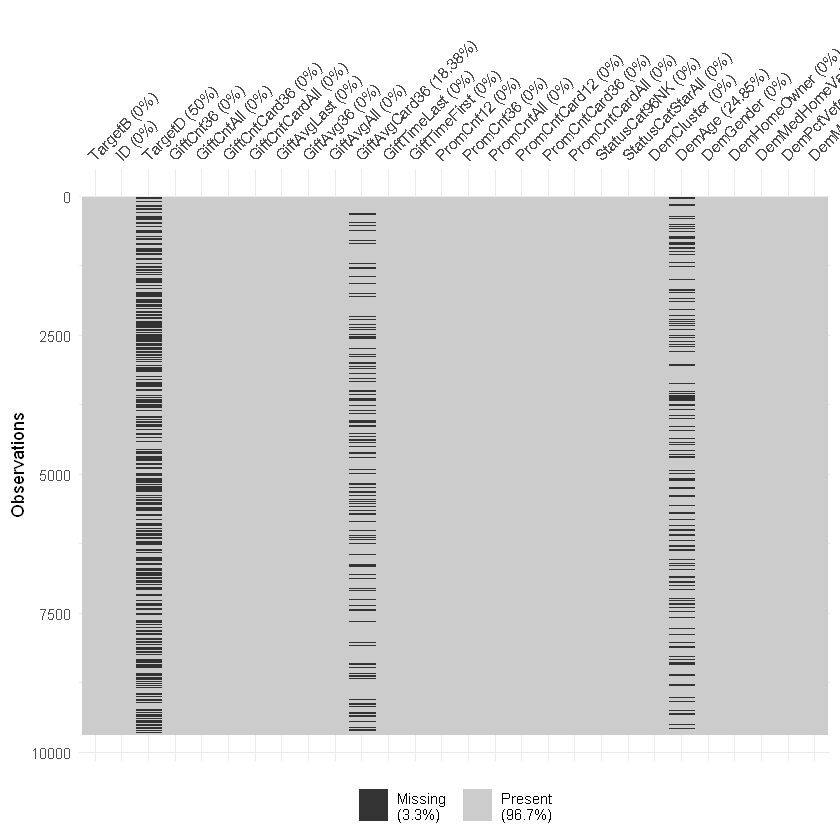

In [83]:
visdat::vis_miss(data) 

In [84]:
summary(data)

    TargetB          ID            TargetD         GiftCnt36     
 Min.   :0.0   Min.   :    12   Min.   :  1.00   Min.   : 0.000  
 1st Qu.:0.0   1st Qu.: 48836   1st Qu.: 10.00   1st Qu.: 2.000  
 Median :0.5   Median : 99106   Median : 13.00   Median : 3.000  
 Mean   :0.5   Mean   : 97975   Mean   : 15.62   Mean   : 3.205  
 3rd Qu.:1.0   3rd Qu.:148539   3rd Qu.: 20.00   3rd Qu.: 4.000  
 Max.   :1.0   Max.   :191779   Max.   :200.00   Max.   :16.000  
                                NA's   :4843                     
   GiftCntAll    GiftCntCard36   GiftCntCardAll    GiftAvgLast    
 Min.   : 1.00   Min.   :0.000   Min.   : 0.000   Min.   :  0.00  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 2.000   1st Qu.: 10.00  
 Median : 8.00   Median :1.000   Median : 4.000   Median : 15.00  
 Mean   :10.51   Mean   :1.857   Mean   : 5.582   Mean   : 16.02  
 3rd Qu.:15.00   3rd Qu.:3.000   3rd Qu.: 8.000   3rd Qu.: 20.00  
 Max.   :91.00   Max.   :9.000   Max.   :41.000   Max.   :450.00  
   

In [85]:
missing<-colnames(data)[colSums(is.na(data)) > 0]


In [86]:
missing

[1] "TargetD"       "GiftAvgCard36" "DemAge"

In [87]:
data$DemAge[is.na(data$DemAge)] <- mean(data$DemAge, na.rm=TRUE)
data$GiftAvgCard36[is.na(data$GiftAvgCard36)] <- mean(data$GiftAvgCard36, na.rm=TRUE)

In [88]:
data$TargetD[is.na(data$TargetD)] <- 0

In [89]:
sapply(data, function(x) sum(is.na(x)))

TargetB               ID          TargetD        GiftCnt36 
               0                0                0                0 
      GiftCntAll    GiftCntCard36   GiftCntCardAll      GiftAvgLast 
               0                0                0                0 
       GiftAvg36       GiftAvgAll    GiftAvgCard36     GiftTimeLast 
               0                0                0                0 
   GiftTimeFirst        PromCnt12        PromCnt36       PromCntAll 
               0                0                0                0 
   PromCntCard12    PromCntCard36   PromCntCardAll    StatusCat96NK 
               0                0                0                0 
StatusCatStarAll       DemCluster           DemAge        DemGender 
               0                0                0                0 
    DemHomeOwner  DemMedHomeValue   DemPctVeterans     DemMedIncome 
               0                0                0                0

In [90]:
head(data)

TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,14974,0,2,4,1,3,17,13.50,9.25,...,13,A,0,0,59.15084,F,U,0,0,0
0,6294,0,1,8,0,3,20,20.00,15.88,...,24,A,0,23,67.00000,F,U,186800,85,0
1,46110,4,6,41,3,20,6,5.17,3.73,...,22,S,1,0,59.15084,M,U,87600,36,38750
1,185937,10,3,12,3,8,10,8.67,8.50,...,16,E,1,0,59.15084,M,U,139200,27,38942
0,29637,0,1,1,1,1,20,20.00,20.00,...,6,F,0,35,53.00000,M,U,168100,37,71509
1,112632,11,3,11,2,9,11,10.33,8.27,...,22,S,1,0,47.00000,M,H,253100,0,92514


In [91]:

library(moments)


In [92]:
data2 <- select_if(data, is.numeric)             # Subset numeric columns with dplyr 

In [93]:
sapply(data2, function(x) kurtosis(x))

TargetB               ID          TargetD        GiftCnt36 
        1.000000         1.764994        44.685204         5.045739 
      GiftCntAll    GiftCntCard36   GiftCntCardAll      GiftAvgLast 
        9.044025         4.493477         5.023200       248.922802 
       GiftAvg36       GiftAvgAll    GiftAvgCard36     GiftTimeLast 
       80.059553       564.464673       110.349361         5.467182 
   GiftTimeFirst        PromCnt12        PromCnt36       PromCntAll 
        1.752158        14.988567         5.172600         3.215864 
   PromCntCard12    PromCntCard36   PromCntCardAll StatusCatStarAll 
        8.795073         2.013044         2.219468         1.026515 
      DemCluster           DemAge  DemMedHomeValue   DemPctVeterans 
        1.877336         3.355830         9.447416         4.273133 
    DemMedIncome 
        3.635899

In [94]:

sapply(data2, function(x) skewness(x))

TargetB               ID          TargetD        GiftCnt36 
      0.00000000      -0.05760371       4.17003793       1.28815343 
      GiftCntAll    GiftCntCard36   GiftCntCardAll      GiftAvgLast 
      1.86282019       1.17227085       1.33114711       9.91735696 
       GiftAvg36       GiftAvgAll    GiftAvgCard36     GiftTimeLast 
      5.62692000      14.48424584       6.69685964      -0.77792677 
   GiftTimeFirst        PromCnt12        PromCnt36       PromCntAll 
      0.19536892       2.87327794       0.26191708       0.46069402 
   PromCntCard12    PromCntCard36   PromCntCardAll StatusCatStarAll 
      0.68488790      -0.42653355       0.14283384      -0.16283311 
      DemCluster           DemAge  DemMedHomeValue   DemPctVeterans 
     -0.08670131      -0.44738327       2.37784234      -0.20702646 
    DemMedIncome 
      0.30997685

In [95]:
summary(data2)

    TargetB          ID            TargetD          GiftCnt36     
 Min.   :0.0   Min.   :    12   Min.   :  0.000   Min.   : 0.000  
 1st Qu.:0.0   1st Qu.: 48836   1st Qu.:  0.000   1st Qu.: 2.000  
 Median :0.5   Median : 99106   Median :  0.500   Median : 3.000  
 Mean   :0.5   Mean   : 97975   Mean   :  7.812   Mean   : 3.205  
 3rd Qu.:1.0   3rd Qu.:148539   3rd Qu.: 13.000   3rd Qu.: 4.000  
 Max.   :1.0   Max.   :191779   Max.   :200.000   Max.   :16.000  
   GiftCntAll    GiftCntCard36   GiftCntCardAll    GiftAvgLast    
 Min.   : 1.00   Min.   :0.000   Min.   : 0.000   Min.   :  0.00  
 1st Qu.: 4.00   1st Qu.:1.000   1st Qu.: 2.000   1st Qu.: 10.00  
 Median : 8.00   Median :1.000   Median : 4.000   Median : 15.00  
 Mean   :10.51   Mean   :1.857   Mean   : 5.582   Mean   : 16.02  
 3rd Qu.:15.00   3rd Qu.:3.000   3rd Qu.: 8.000   3rd Qu.: 20.00  
 Max.   :91.00   Max.   :9.000   Max.   :41.000   Max.   :450.00  
   GiftAvg36        GiftAvgAll     GiftAvgCard36     GiftTimeL

In [96]:
my_plots <- lapply(names(data), function(var_x){
  p <- 
    ggplot(data) +
    aes_string(var_x)

  if(is.numeric(data[[var_x]])) {
    p <- p + geom_density()

  } else {
    p <- p + geom_bar()
  } 

})

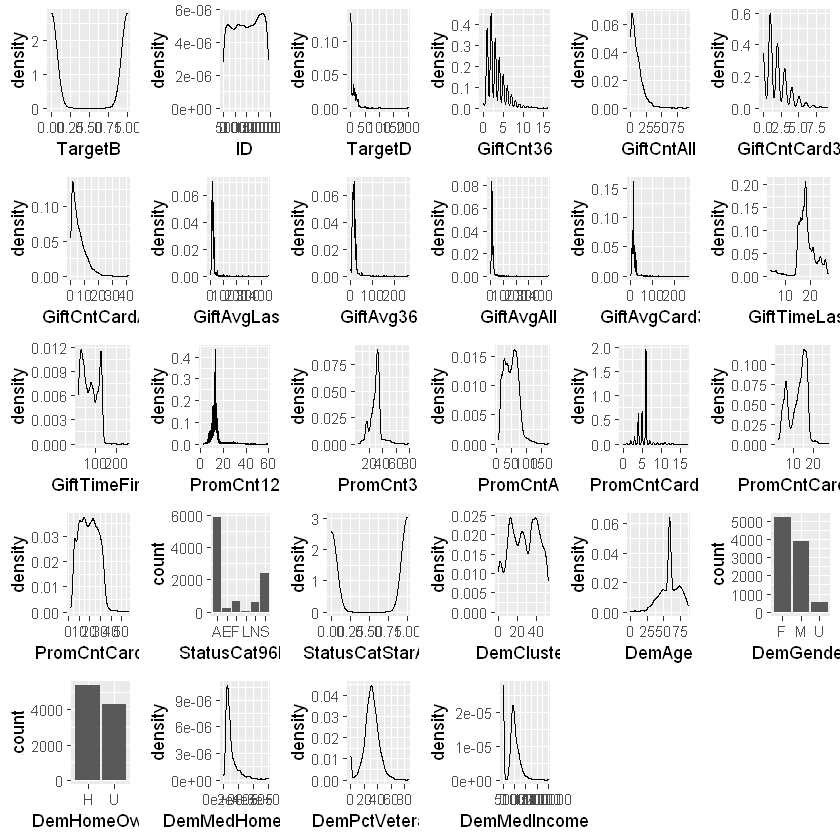

In [97]:
plot_grid(plotlist = my_plots
         )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


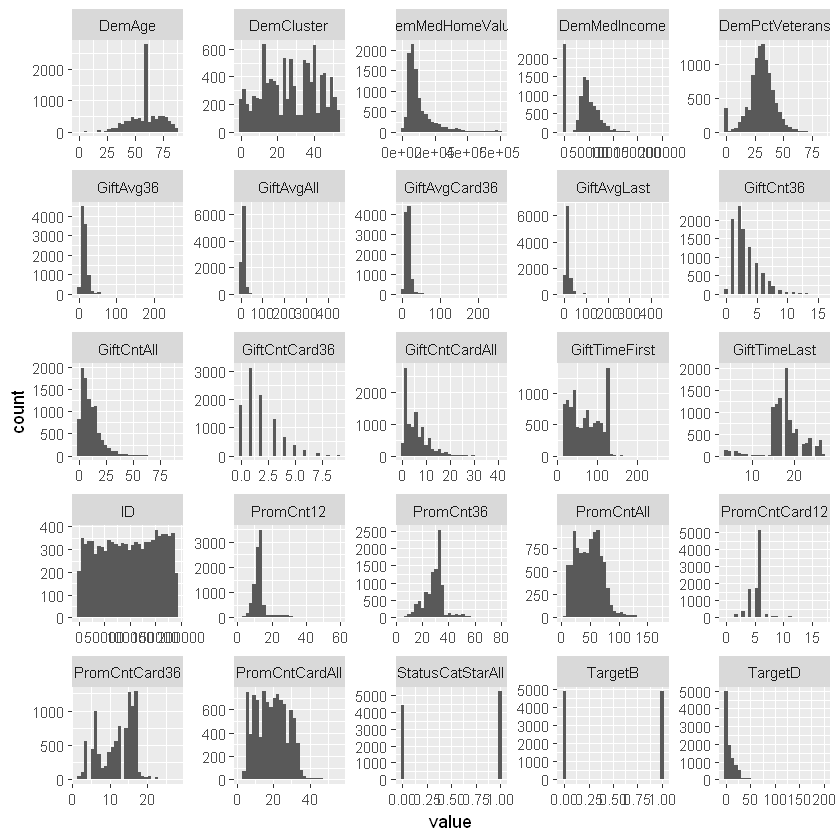

In [98]:
data %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
geom_histogram()



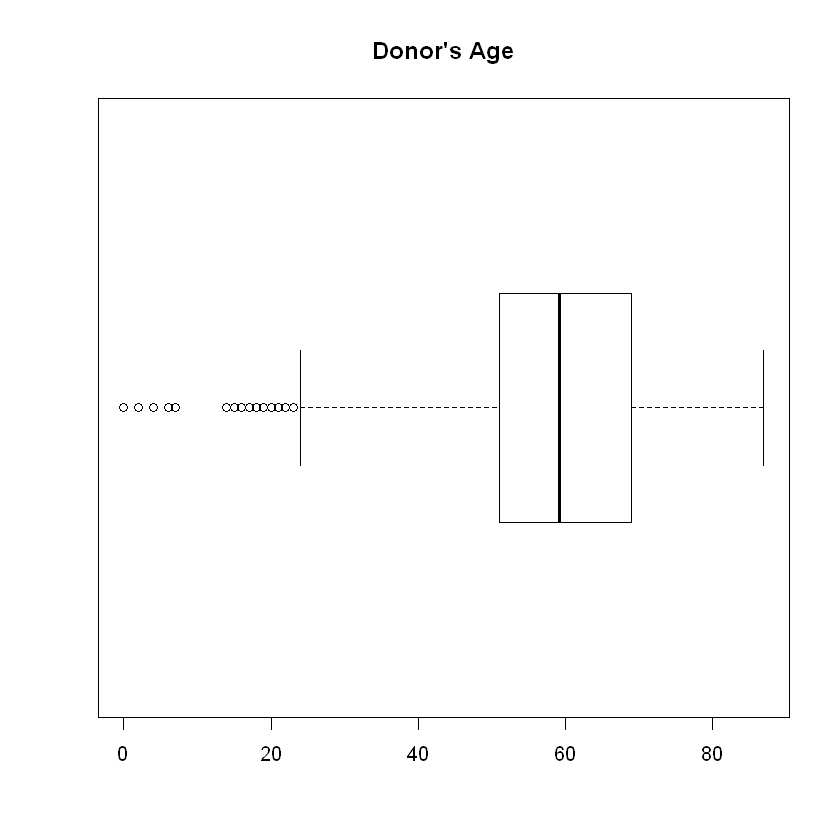

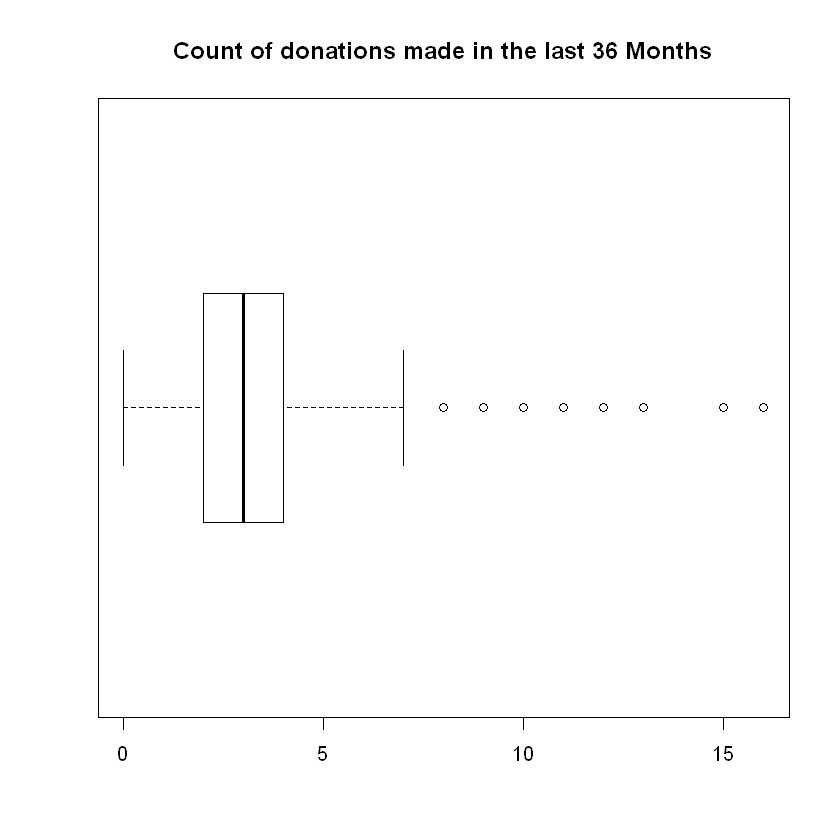

In [99]:
boxplot(data$DemAge, horizontal=TRUE, main="Donor's Age")
boxplot(data$GiftCnt36, horizontal=TRUE, main="Count of donations made in the last 36 Months")

In [100]:
data2<- log(data2)
head(data2)

TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
-Inf,9.614071,-Inf,0.6931472,1.386294,0.0000000,1.098612,2.833213,2.602690,2.224624,...,3.258097,1.0986123,2.079442,2.564949,-Inf,-Inf,4.080091,-Inf,-Inf,-Inf
-Inf,8.747352,-Inf,0.0000000,2.079442,-Inf,1.098612,2.995732,2.995732,2.765060,...,4.369448,1.6094379,1.609438,3.178054,-Inf,3.135494,4.204693,12.13779,4.442651,-Inf
0,10.738785,1.386294,1.7917595,3.713572,1.0986123,2.995732,1.791759,1.642873,1.316408,...,3.931826,1.6094379,2.397895,3.091042,0,-Inf,4.080091,11.38054,3.583519,10.56489
0,12.133163,2.302585,1.0986123,2.484907,1.0986123,2.079442,2.302585,2.159869,2.140066,...,3.784190,0.6931472,1.791759,2.772589,0,-Inf,4.080091,11.84367,3.295837,10.56983
-Inf,10.296779,-Inf,0.0000000,0.000000,0.0000000,0.000000,2.995732,2.995732,2.995732,...,2.564949,1.3862944,1.945910,1.791759,-Inf,3.555348,3.970292,12.03231,3.610918,11.17758
0,11.631881,2.397895,1.0986123,2.397895,0.6931472,2.197225,2.397895,2.335052,2.112635,...,3.806662,1.6094379,2.302585,3.091042,0,-Inf,3.850148,12.44154,-Inf,11.43512


In [101]:
scale <- function(x) {
return ((x - min(x)) / (max(x) - min(x)))
}

In [102]:
sapply(data2, function(x) scale(x))

TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntAll,PromCntCard12,PromCntCard36,PromCntCardAll,StatusCatStarAll,DemCluster,DemAge,DemMedHomeValue,DemPctVeterans,DemMedIncome
NaN,0.7365453,NaN,NaN,0.3073238,NaN,NaN,NaN,NaN,0.3189390,...,0.4644609,NaN,0.5252991,0.5617309,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.6470008,NaN,NaN,0.4609857,NaN,NaN,NaN,NaN,0.4136896,...,0.7775514,NaN,0.3472038,0.7457245,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.8527445,NaN,NaN,0.8232515,NaN,NaN,NaN,NaN,0.1597086,...,0.6542642,NaN,0.6459686,0.7196123,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.9968039,NaN,NaN,0.5508721,NaN,NaN,NaN,NaN,0.3041142,...,0.6126722,NaN,0.4162897,0.6240438,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.8070789,NaN,NaN,0.0000000,NaN,NaN,NaN,NaN,0.4541315,...,0.2691872,NaN,0.4747009,0.3296953,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.9450142,NaN,NaN,0.5315828,NaN,NaN,NaN,NaN,0.2993048,...,0.6190032,NaN,0.6098533,0.7196123,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.9547083,NaN,NaN,0.3073238,NaN,NaN,NaN,NaN,0.3786056,...,0.6126722,NaN,0.7879486,0.6593907,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.8511618,NaN,NaN,0.3073238,NaN,NaN,NaN,NaN,0.3571107,...,0.5858213,NaN,0.2626495,0.6046757,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.7616568,NaN,NaN,0.2435483,NaN,NaN,NaN,NaN,0.5151768,...,0.6806124,NaN,0.4162897,0.7196123,NaN,NaN,NaN,NaN,NaN,NaN
NaN,0.9924540,NaN,NaN,0.3567919,NaN,NaN,NaN,NaN,0.3586287,...,0.6486854,NaN,0.6459686,0.6593907,NaN,NaN,NaN,NaN,NaN,NaN


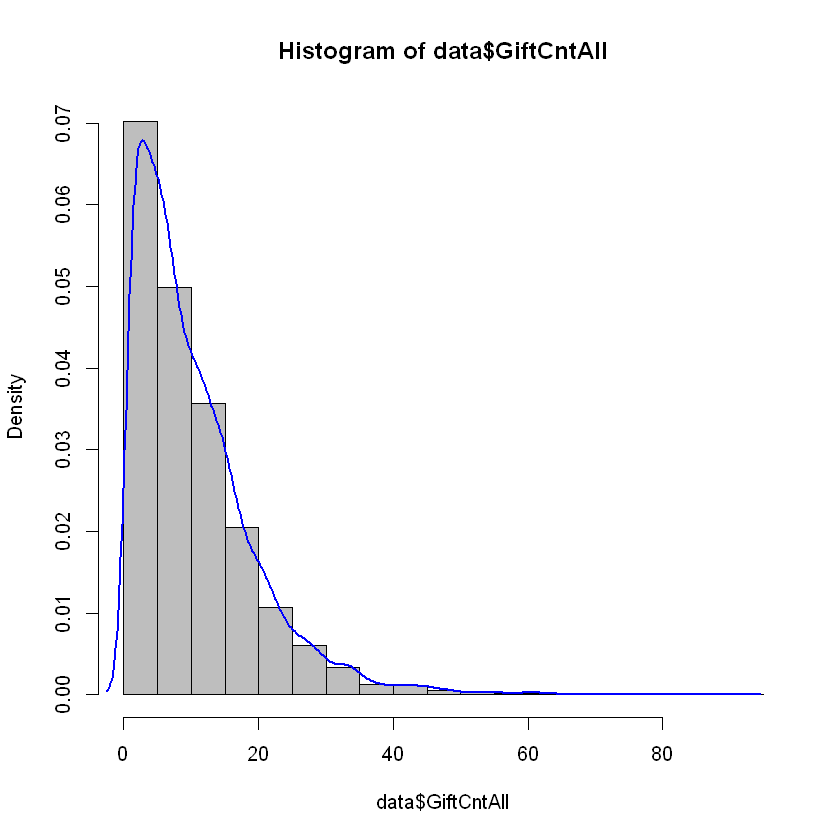

In [103]:
hist(data$GiftCntAll, prob=TRUE, col="grey")
lines(density(data$GiftCntAll), col="blue", lwd=2) 

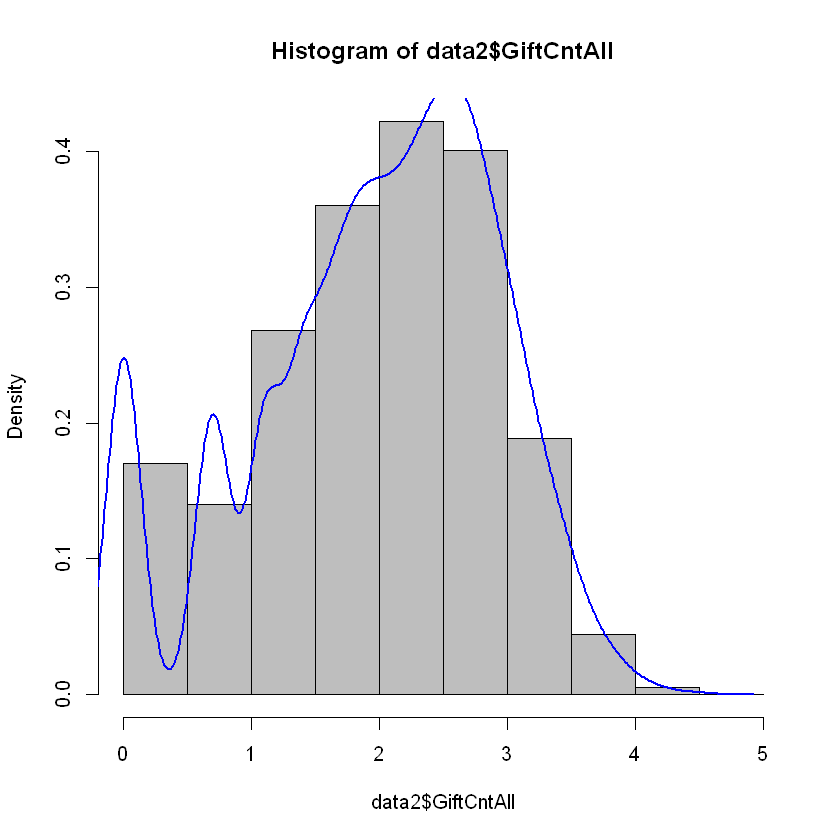

In [104]:
hist(data2$GiftCntAll, prob=TRUE, col="grey")
lines(density(data2$GiftCntAll), col="blue", lwd=2) 

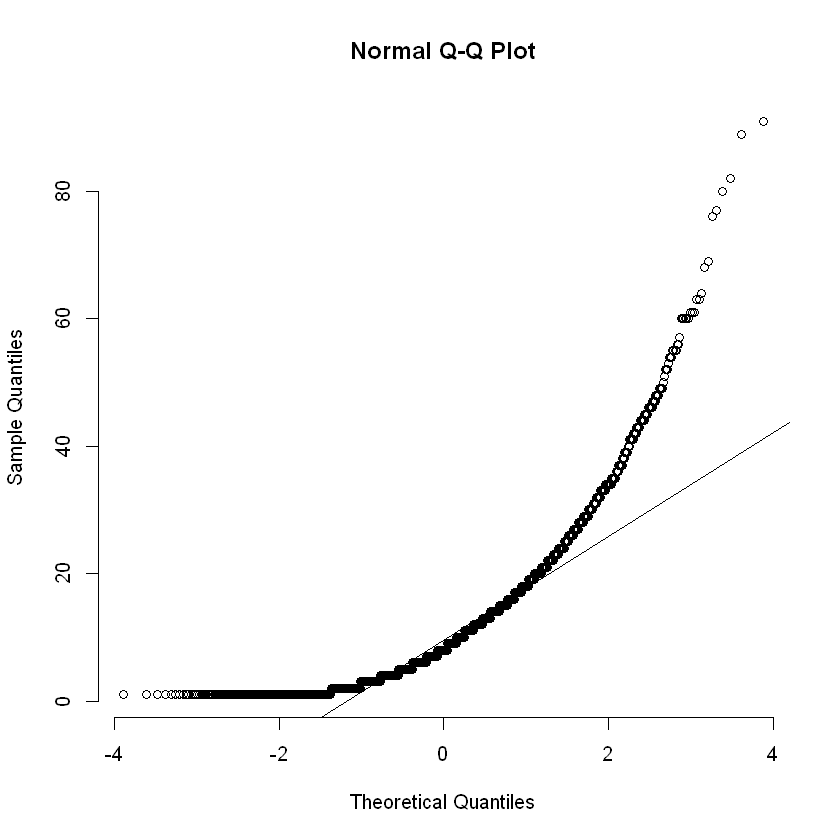

In [105]:
qqnorm(data$GiftCntAll, pch = 1, frame = FALSE)
qqline(data$GiftCntAll)


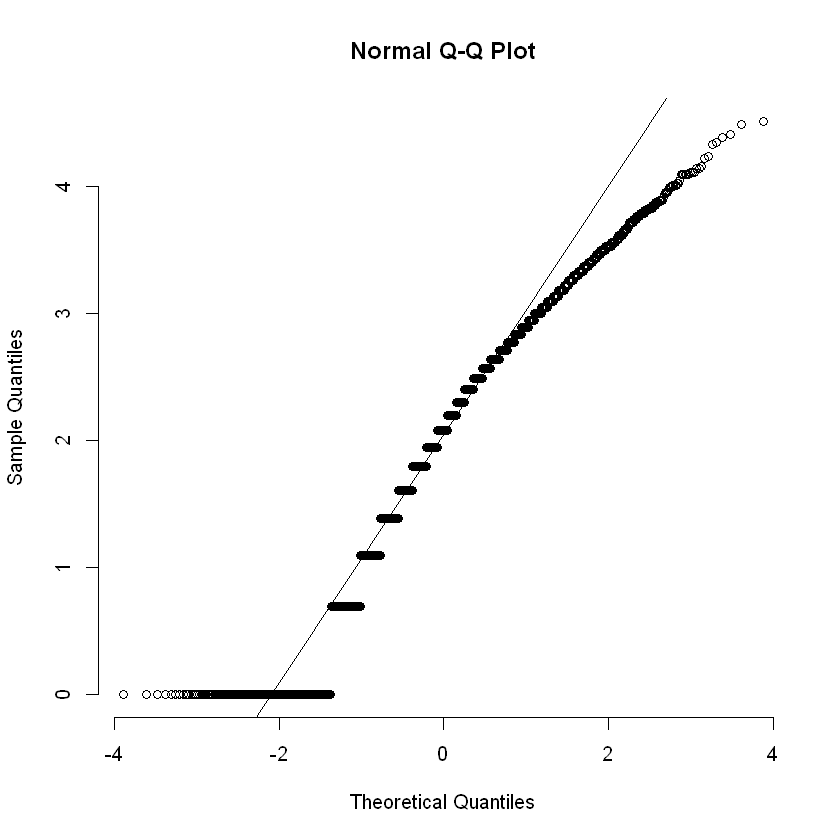

In [106]:
qqnorm(data2$GiftCntAll, pch = 1, frame = FALSE)
qqline(data2$GiftCntAll)


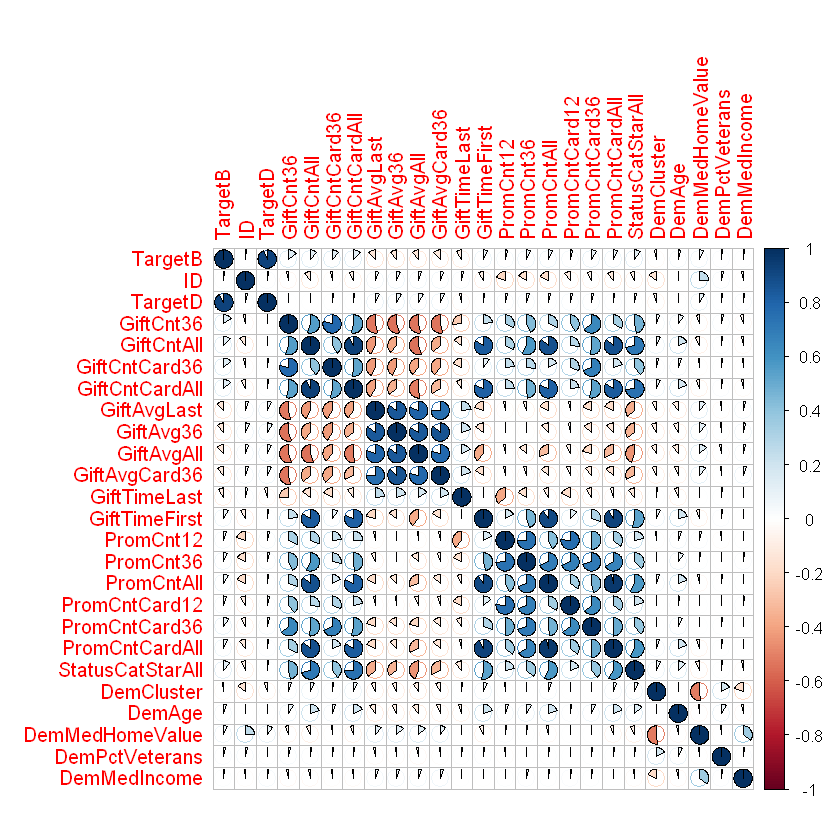

In [107]:
cordata.cor = cor(data2, method = c("spearman"))
corrplot(cordata.cor,method='pie')

In [108]:
df = sort(sample(nrow(data2), nrow(data2)*.7))
train<-data[df,]
test<-data[-df,]
dfv = sort(sample(nrow(test), nrow(test)*.5))
test<-data[dfv,]
valid<-data[-dfv,]

In [109]:
install.packages("SmartEDA")




  There is a binary version available but the source version is later:
         binary source needs_compilation
SmartEDA  0.3.7  0.3.8             FALSE



installing the source package 'SmartEDA'



In [110]:
library(SmartEDA)

In [116]:
ExpData(data, type=1)

Descriptions,Value
Sample size (nrow),9686
No. of variables (ncol),28
No. of numeric/interger variables,25
No. of factor variables,3
No. of text variables,0
No. of logical variables,0
No. of identifier variables,1
No. of date variables,0
No. of zero variance variables (uniform),0
%. of variables having complete cases,89.29% (25)


In [117]:
ExpData(data, type=2)

Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
1,TargetB,integer,9686,0,0.000,2
2,ID,integer,9686,0,0.000,9686
3,TargetD,numeric,4843,4843,0.500,70
4,GiftCnt36,integer,9686,0,0.000,16
5,GiftCntAll,integer,9686,0,0.000,69
6,GiftCntCard36,integer,9686,0,0.000,10
7,GiftCntCardAll,integer,9686,0,0.000,31
8,GiftAvgLast,numeric,9686,0,0.000,90
9,GiftAvg36,numeric,9686,0,0.000,654
10,GiftAvgAll,numeric,9686,0,0.000,1584


[[1]]

[[2]]


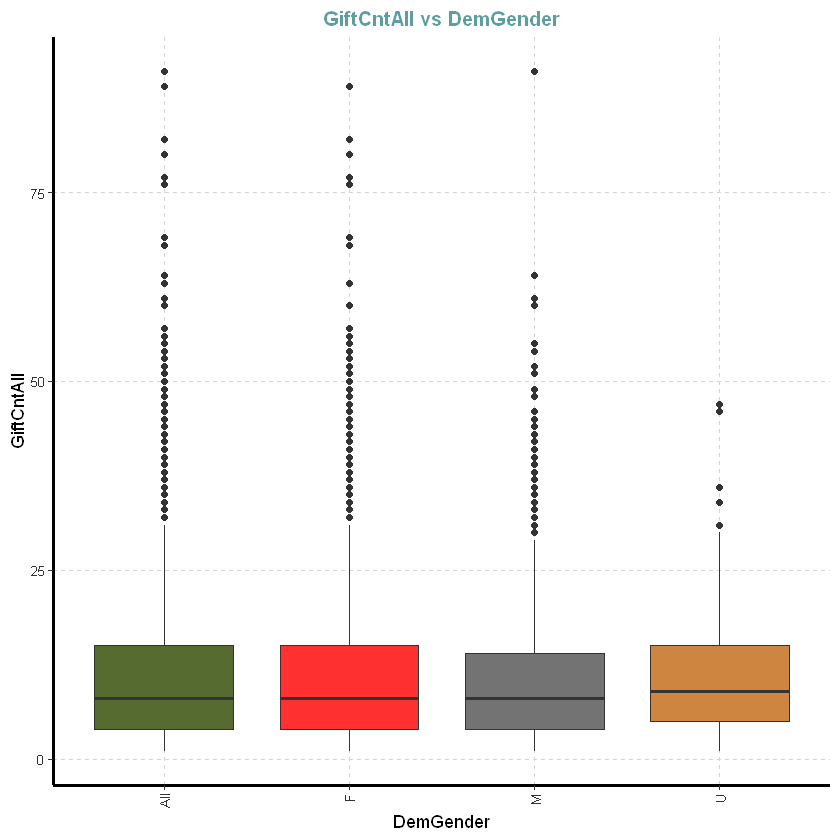

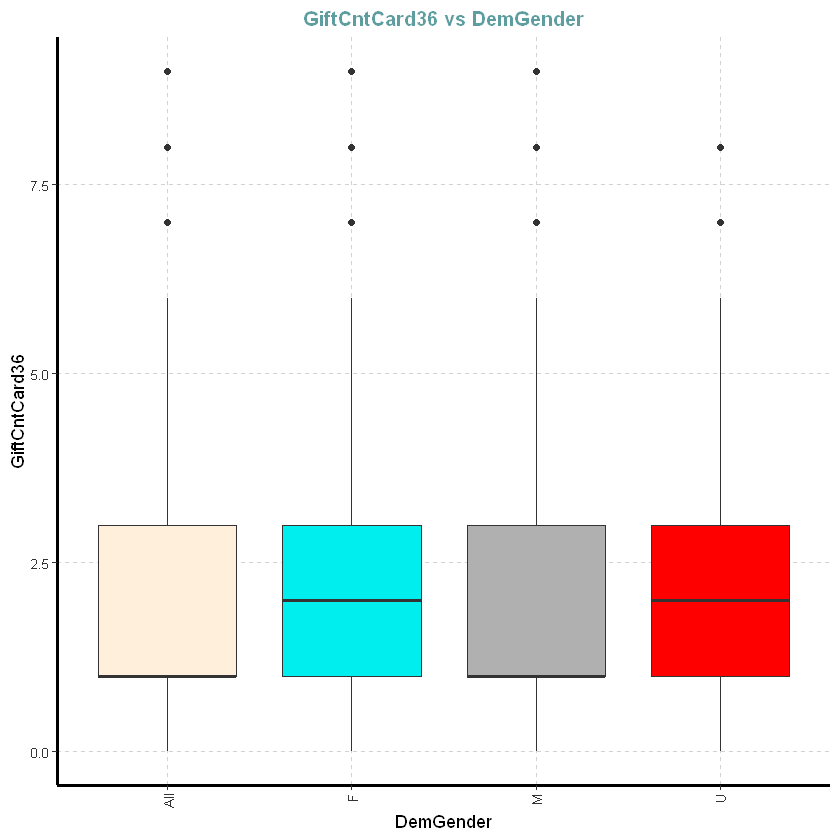

In [120]:
ExpNumViz(data = data,target = "DemGender")[4:5]

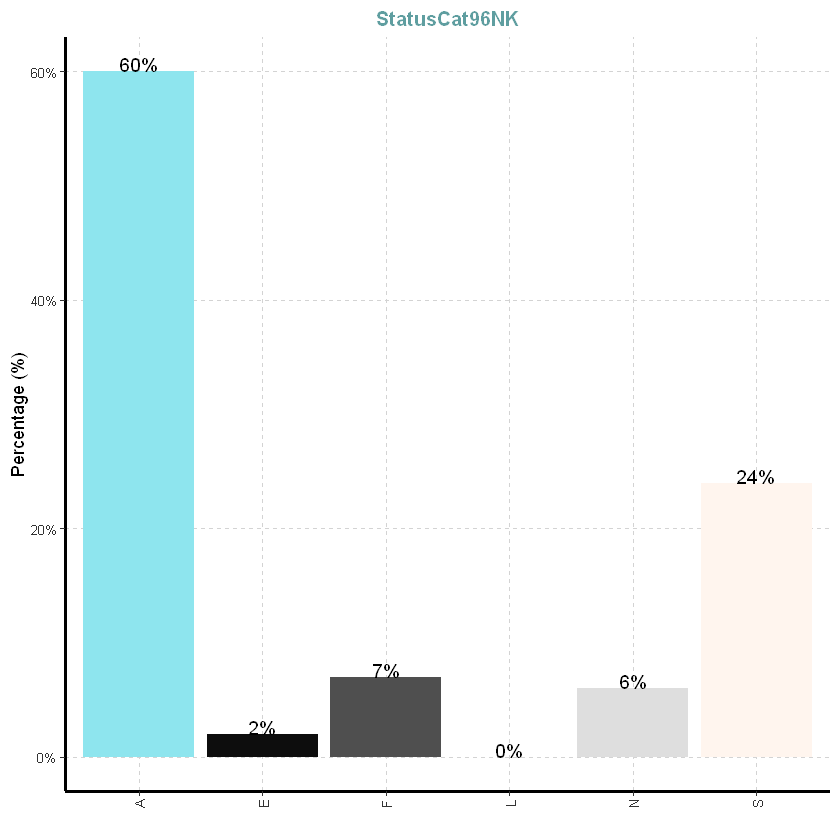

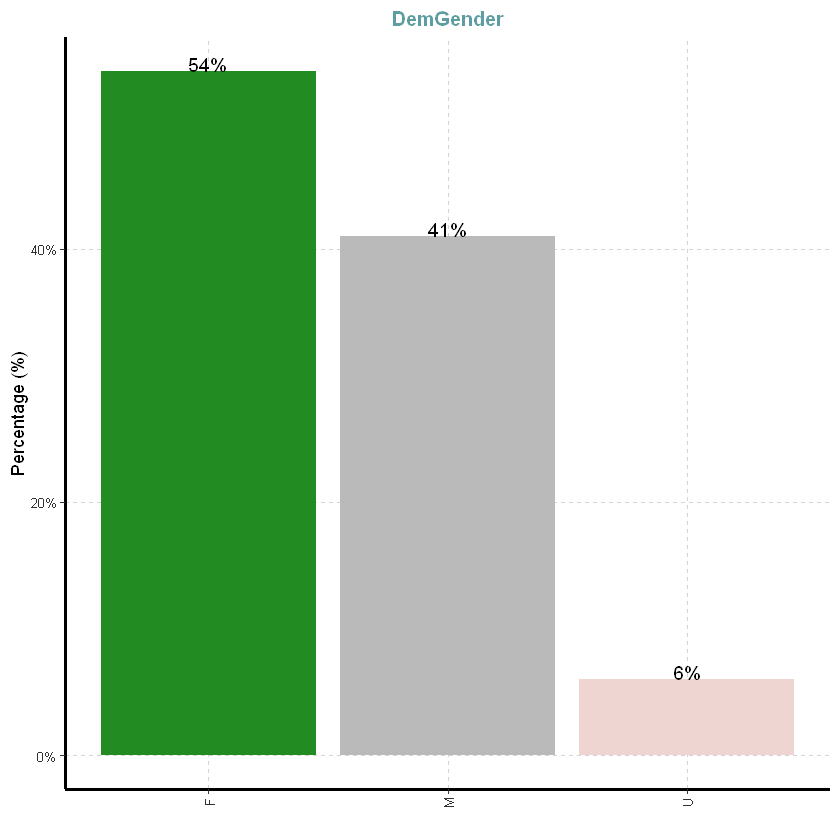

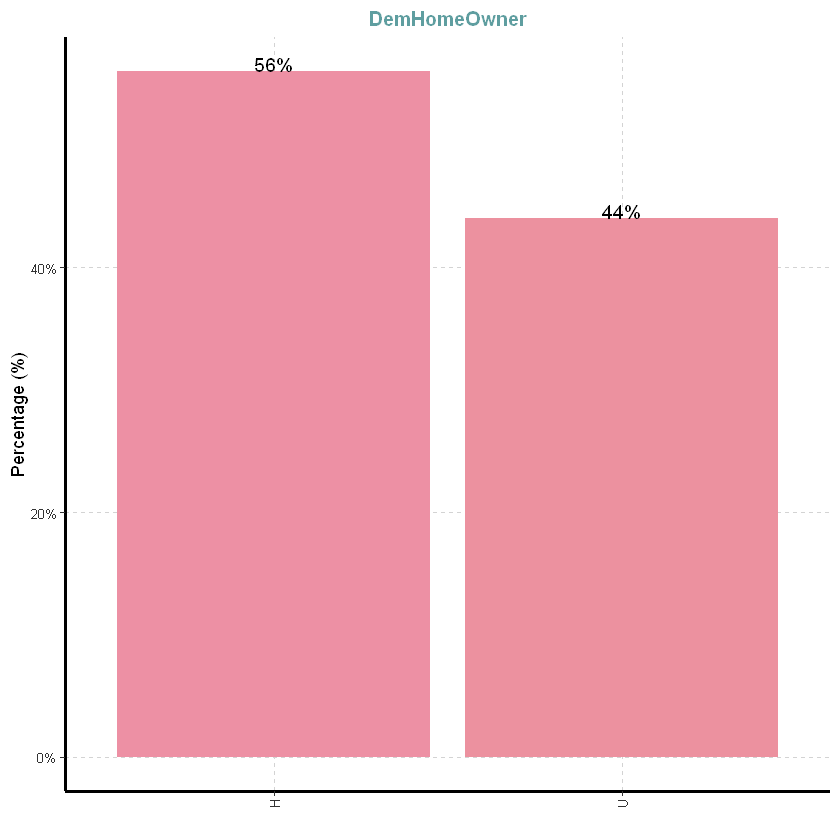

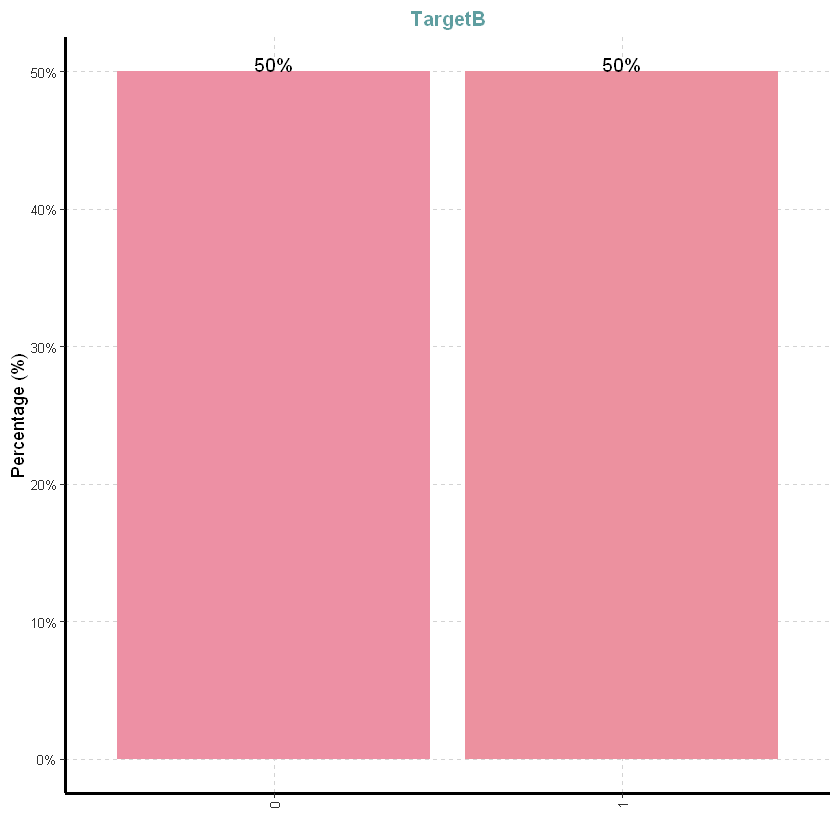

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


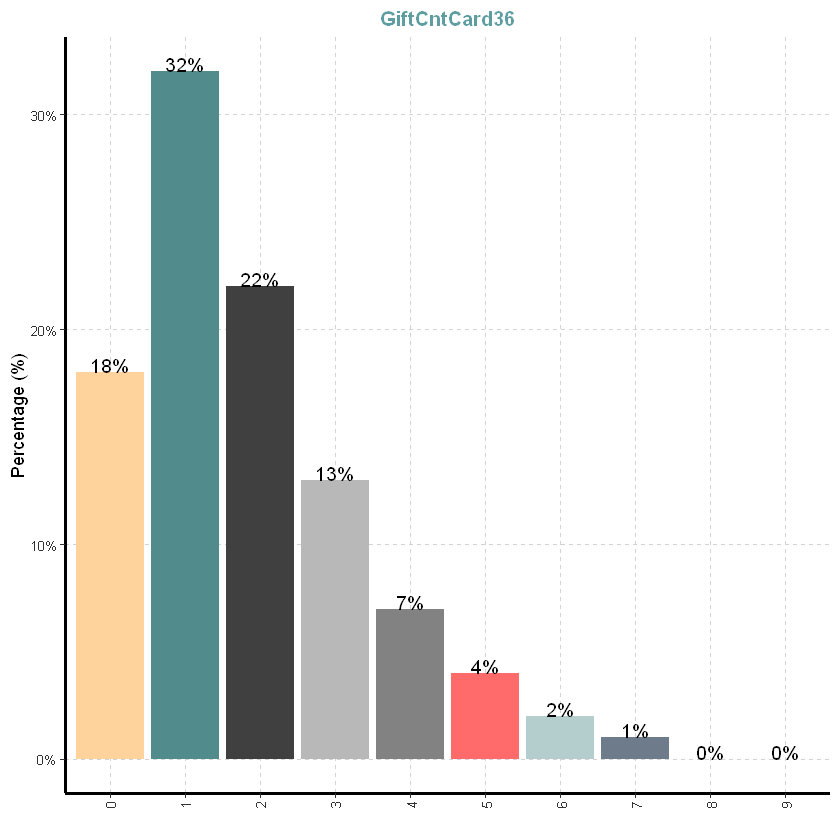

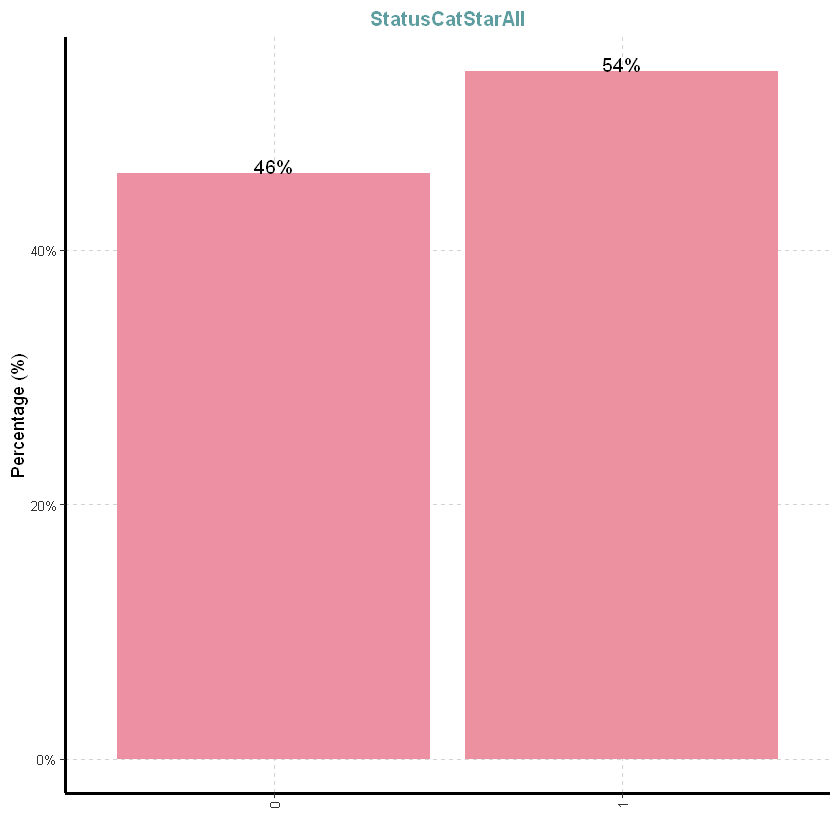

In [45]:
ExpCatViz(data)

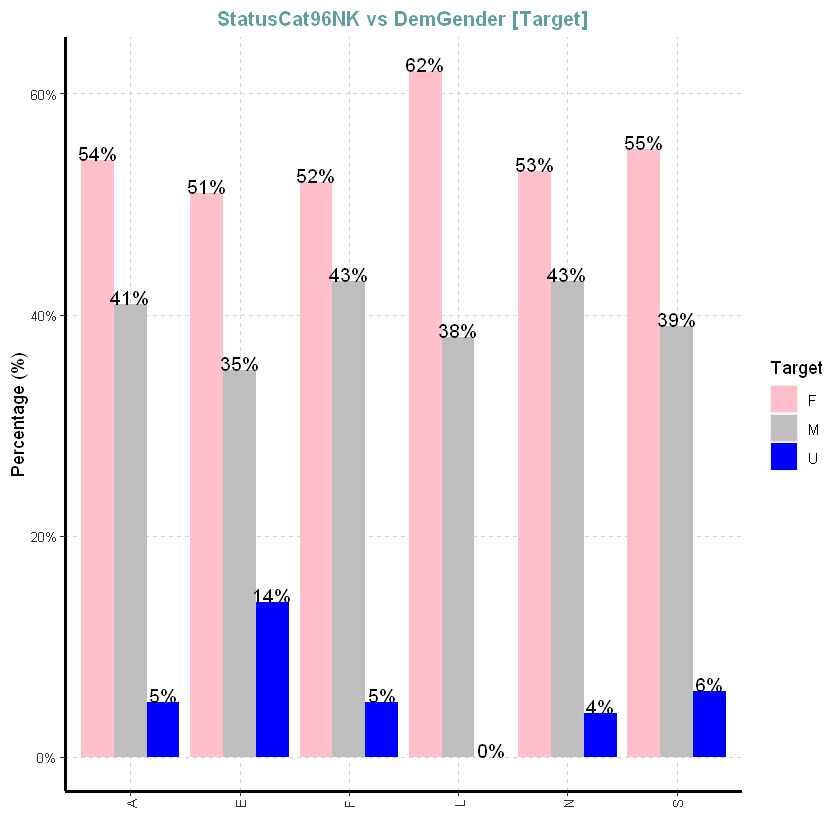

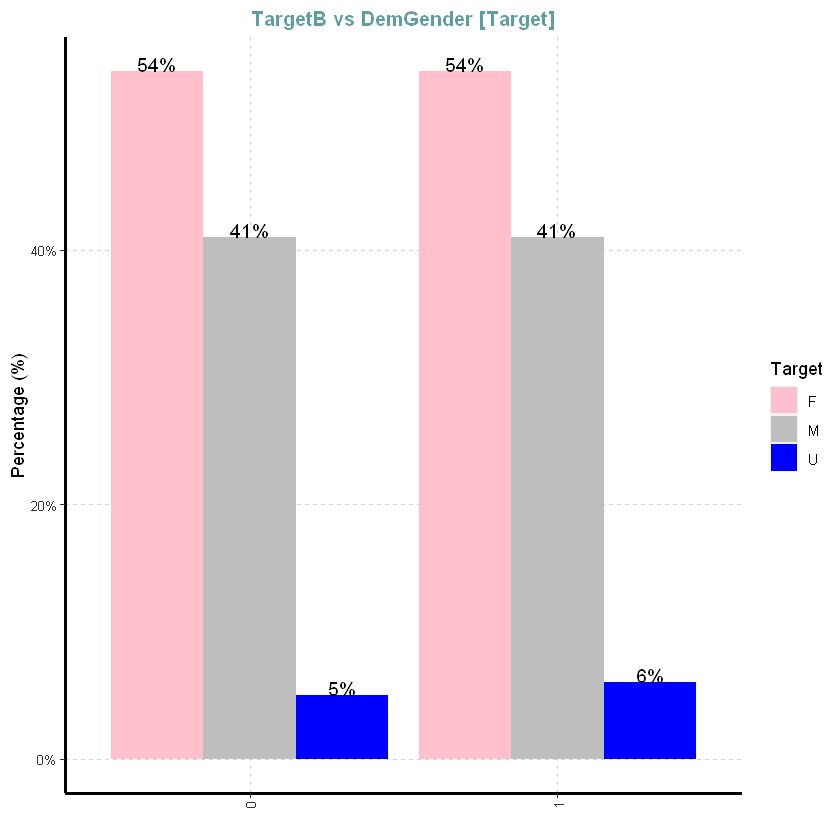

[[1]]

[[2]]

[[3]]

[[4]]


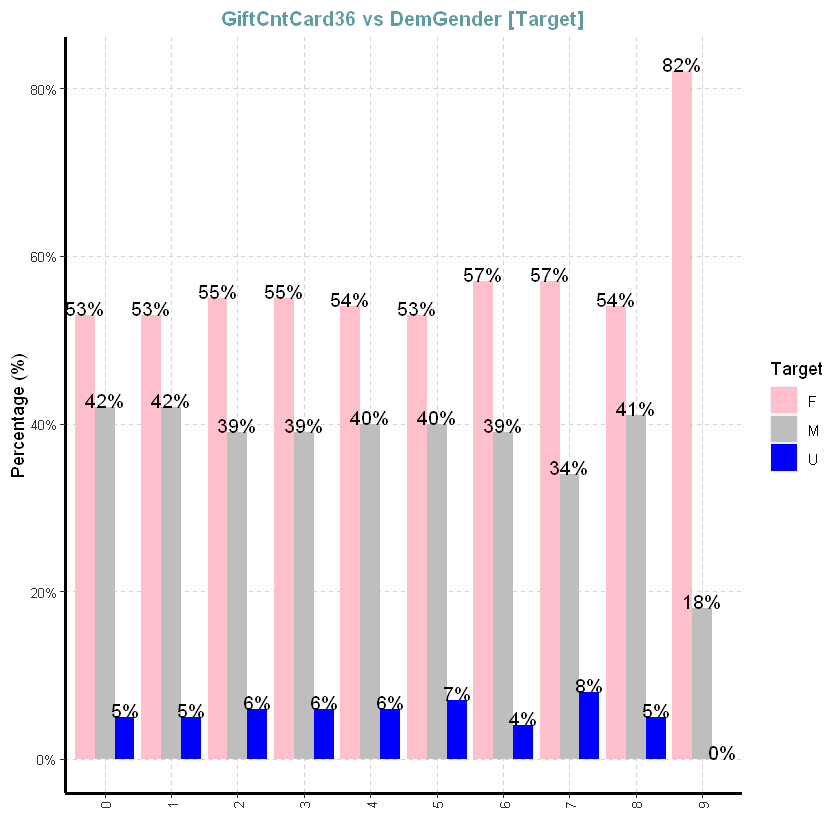

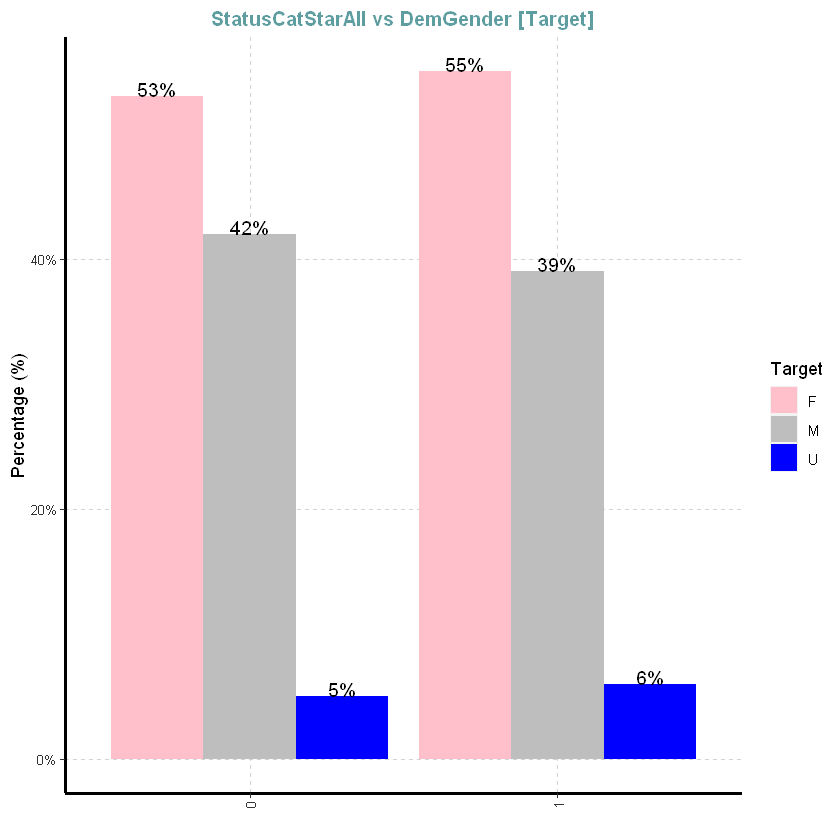

In [48]:
ExpCatViz(data, margin = 2, target = "DemGender", 
          col = c("pink","grey","blue"))[c(1,3:5)]

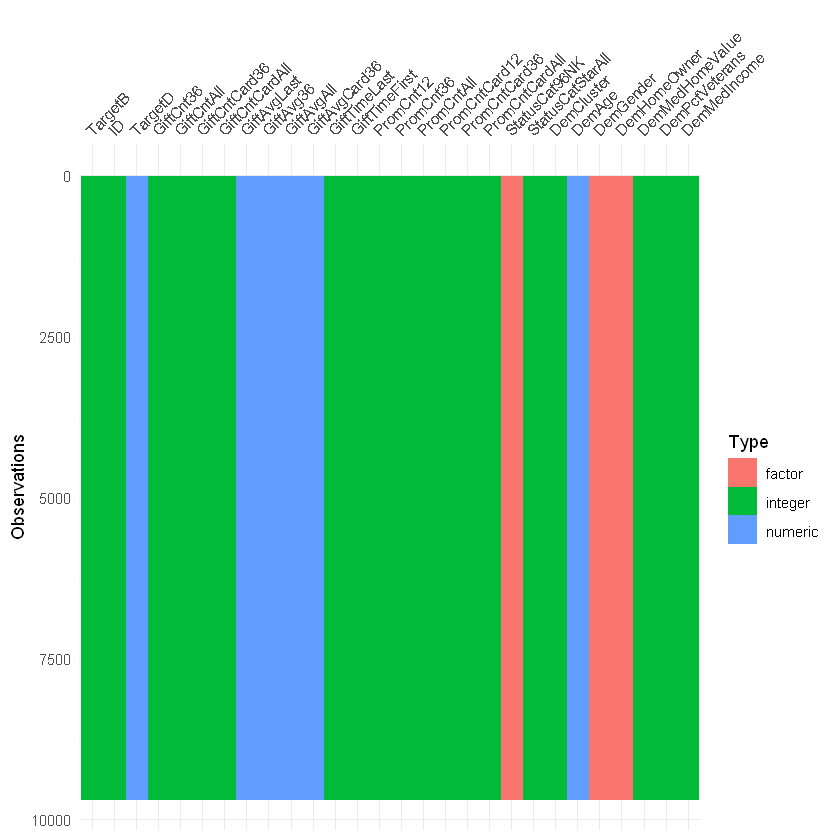

In [60]:
visdat::vis_dat(data,sort_type = FALSE) 

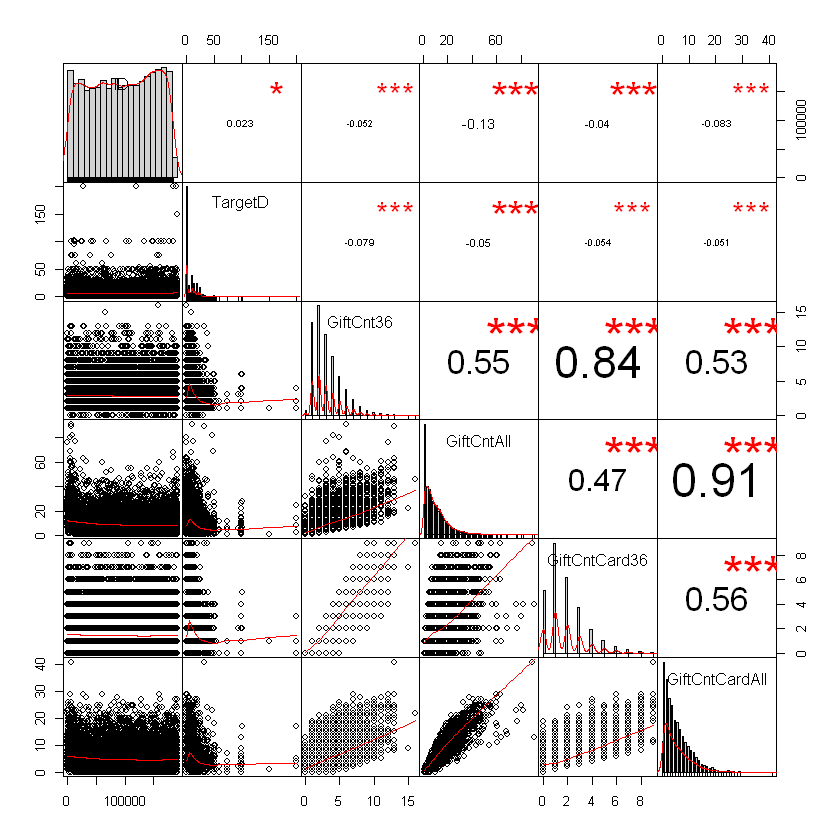

In [73]:
PerformanceAnalytics::chart.Correlation(data[,2:7], histogram = TRUE, pch = 15)

In [124]:
if (!require(devtools)) install.packages("devtools")
devtools::install_github("boxuancui/DataExplorer")

Loading required package: devtools
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'devtools'"also installing the dependencies 'cli', 'rcmdcheck', 'sessioninfo'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
cli          2.5.0  3.1.0              TRUE
rcmdcheck    1.3.3  1.4.0             FALSE
sessioninfo  1.1.1  1.2.2             FALSE
devtools     2.4.1  2.4.3             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saniy\AppData\Local\Temp\RtmpuEFij1\downloaded_packages


installing the source packages 'rcmdcheck', 'sessioninfo', 'devtools'

Warning message in install.packages("devtools"):
"installation of package 'sessioninfo' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"

ERROR: Error in loadNamespace(name): there is no package called 'devtools'


In [123]:
install.packages("devtools")

also installing the dependencies 'cli', 'rcmdcheck', 'sessioninfo'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
cli          2.5.0  3.1.0              TRUE
rcmdcheck    1.3.3  1.4.0             FALSE
sessioninfo  1.1.1  1.2.2             FALSE
devtools     2.4.1  2.4.3             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saniy\AppData\Local\Temp\RtmpuEFij1\downloaded_packages


installing the source packages 'rcmdcheck', 'sessioninfo', 'devtools'

Warning message in install.packages("devtools"):
"installation of package 'sessioninfo' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"

Numerical correlations (Pearson’s coefficient) between numerical variables in the dataset, with larger sources for larger correlations
A mini-scatterplot between each of the pairs of variables
A histogram and density plot of each variable